# [ML Mid Assignment] Clustering 
2018204094 박형빈

군집화 분석 수행

군집화의 대표적인 알고리즘 3가지를 하나의 데이터셋에 비교, 분석해보고 가장 최적의 방법론을 찾아본다. 

*주석, Markdown 부분을 통해 결과를 해석하고 코드에 대한 설명을 첨부하였습니다* 

# 1. Data Load

original data -> obesity

이번 군집화 분석 수행을 위한 데이터셋은 **식습관과 체질에 따른 비만도 측정 데이터**입니다. 

[https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+]

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)

In [2]:
path = "./Dataset/"

obesity = pd.read_csv(path+"ObesityDataSet.csv")

# 원본 데이터 : obesity 
# original data -> obesity
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# 2. EDA 

**식습관과 체질에 따른 비만도 측정 데이터**

**2,111 rows X 17 columns**

- **범주형 변수** 
    - **명목형 변수 Nominal Variable** 
    - Gender (2)
    - MTRANS (5)
    - **순서형 변수 Ordinary Variable** 
    - SMOKE (2)
    - family_history_with_overweight (2)
    - FAVC, Frequent consumption of high caloric food (2) 
    - SCC, Calories consumption monitoring (2)
    - CAEC, Consumption of food between meals (4)
    - CALC, Consumption of alcohol (4)
    
- **연속형 변수** 
    - Age 
    - Height
    - Weight
    - FCVC, Frequency of consumption of vegetables
    - NCP, Number of main meals
    - CH2O, Consumption of water daily
    - FAF, Physical activity frequency 
    - TUE, Time using technology devices
    
- **y 변수** 
    - NObeyesdad (7)
    - 'Insufficient_Weight' 저체중
    - 'Normal_Weight' 정상
    - 'Overweight_Level_I', 'Overweight_Level_II' 과체중 
    - 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' 비만

<AxesSubplot:>

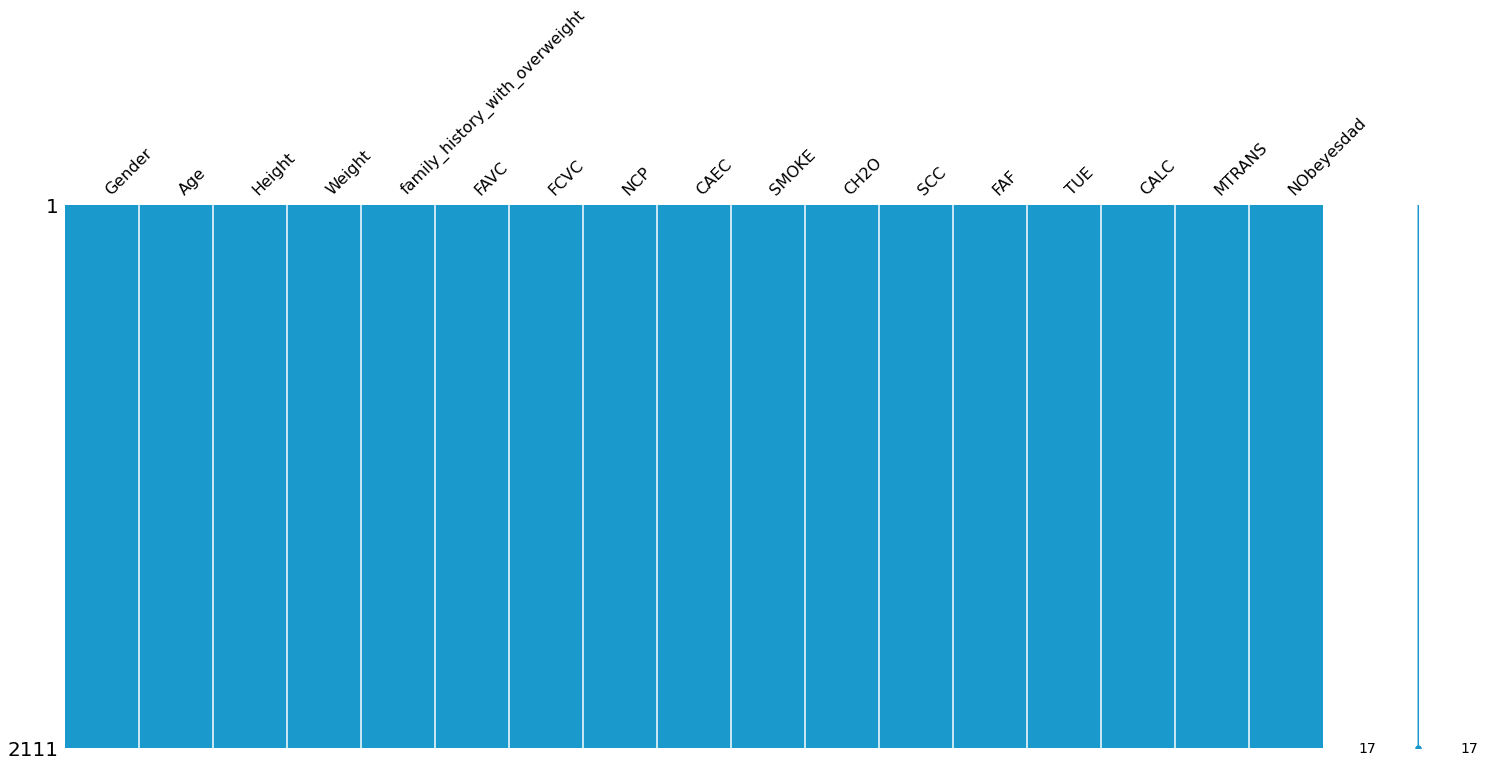

In [4]:
# check missing value 
# 결측치 확인을 위한 plotting을 진행하였고, 확인 결과 결측치는 존재하지 않습니다 
msno.matrix(obesity.iloc[:, :], color=(0.1, 0.6, 0.8))

In [5]:
# 각 column의 unique value, value 개수를 확인합니다 
# 이로부터 범주형, 연속형, 범주형 중에서도 명목형, 순서형 변수를 확인하고 
# 범주형 변수의 경우 각각이 가지는 class 개수를 확인합니다. (정리된 내용은 상단에 작성)
for c in obesity.columns : 
    print(c,"(", obesity[c].nunique(), "): ", obesity[c].unique())
    print()

Gender ( 2 ):  ['Female' 'Male']

Age ( 1402 ):  [21.       23.       27.       ... 22.524036 24.361936 23.664709]

Height ( 1574 ):  [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Weight ( 1525 ):  [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

family_history_with_overweight ( 2 ):  ['yes' 'no']

FAVC ( 2 ):  ['no' 'yes']

FCVC ( 810 ):  [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.

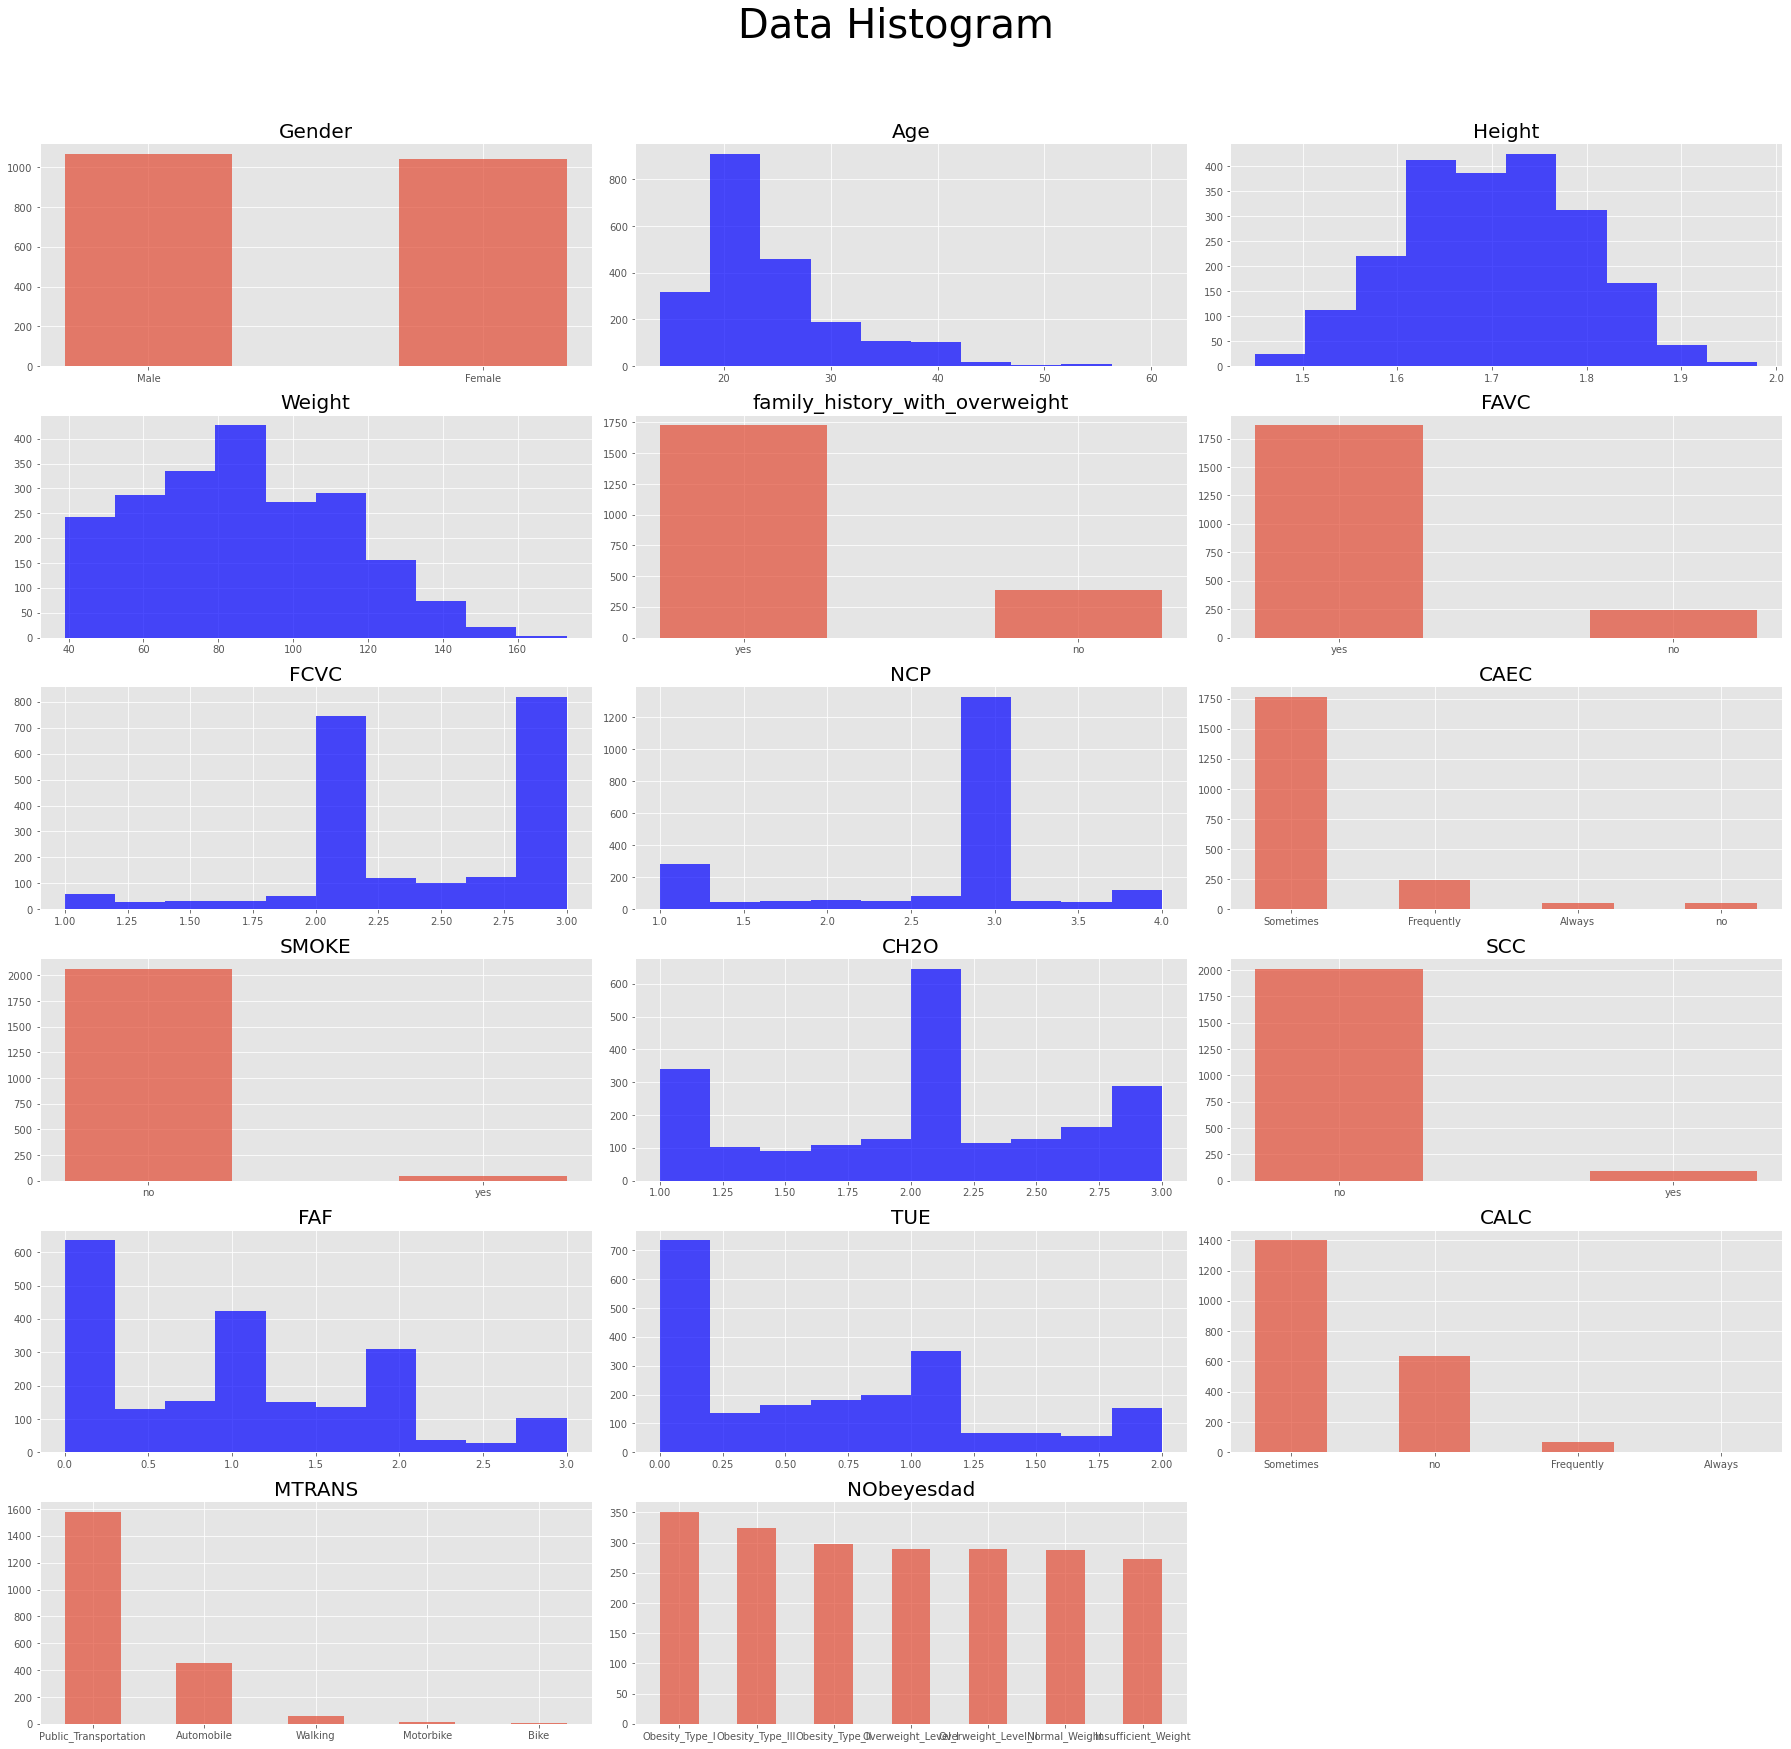

In [6]:
plt.style.use("ggplot")

# 히스토그램을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,25))
plt.suptitle("Data Histogram", fontsize=40)

cols = obesity.columns
for i in range(len(cols)):
    plt.subplot(6,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(obesity[cols[i]].unique()) > 20:
        plt.hist(obesity[cols[i]], color='b', alpha=0.7)
    else:
        temp = obesity[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()

- y variable 인 NObeyesdad의 분포는 고르게 되어 있는 것 같습니다
- FCVC, Frequency of consumption of vegetables 야채 소비량 변수의 분포는 2개의 modality가 존재하는 것 같습니다
- NCP, Number of main meals 하루 식사량은 양 끝단 값에 이상치가 존재하는 분포인 것 같습니다 
- Age 나이 변수를 보니 20대~30대에 몰려 있는 데이터인 것 같습니다 
- family_history_with_overweight, SMOKE, SCC(Calories consumption monitoring 칼로리 소비 모니터링 여부), FAVC(Frequent consumption of high caloric food 고칼로리 음식 섭취 빈도) 변수들의 분포는 한 쪽 class(대부분 yes)에 몰려 있는 것 같습니다 

# 3. Preprocessing

data -> processed_data

- 결측치 제거 -> **필요 없음** 
- 범주형 - 순서형 변수 
    - FAVC, SCC, family_history_with_overweight, SMOKE 
        - yes 1 
        - no 0 
    - CAEC, CALC
        - 'no', 'Sometimes', 'Frequently', 'Always'
        - 0, 1, 2, 3 
- 범주형 - 명목형 변수 
    - Gender, MTRANS
    - One-hot Encoding 
- 정규화
    - Standard Scaler 
    - Clustering은 거리기반 알고리즘이기 때문에 단위의 영향력을 제거하기 위해 표준화 진행해야 합니다

- y 변수 
    - class 7
    - class 4 (transform) 

In [7]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
# 전처리를 위해 원본 데이터를 따로 저장합니다 
# 원본 데이터 : data
# 전처리된 데이터 : processed_data
# oesity -> processed_data 
processed_data = obesity[['Gender', 'Height', 'NObeyesdad']].copy()
#processed_data = obesity.drop(['NCP', 'Age','Weight', 'TUE'], axis=1).copy()

범주형 변수에 대하여 숫자형(int)로 변환해주어야 합니다.  
순서성이 있냐 없냐에 따라 쓰이는 Encdoing 방식이 다름으로 주의해야 합니다.  

순서성이 있는 변수에 대해서는 Ordinary Encoding을  
순서성이 없는 변수에 대해서는 One hot Encdoing을 적용하였습니다. 

In [9]:
# Encoding 

# Ordinary Encoding 
two_cols = []
four_cols = []
four_dict = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}

cols = processed_data.columns
for c in cols :
    if processed_data[c].nunique() == 2 and c != 'Gender':
        two_cols.append(c)
    if processed_data[c].nunique() == 4 : 
        four_cols.append(c)

for c in two_cols : 
    processed_data[c] = processed_data[c].apply(lambda x : 1 if x == 'yes' else 0 )
for c in four_cols : 
    processed_data[c] = processed_data[c].map(four_dict)
    
# One-hot Encdoing : gender 
df_gender = pd.get_dummies(processed_data['Gender'])
processed_data = processed_data.drop(['Gender'], axis=1)
processed_data = pd.concat([processed_data, df_gender], axis=1)

# One-hot Encdoing : MTRANS 
#df_trans = pd.get_dummies(processed_data['MTRANS'])
#processed_data = processed_data.drop(['MTRANS'], axis=1)
#processed_data = pd.concat([processed_data, df_trans], axis=1)

서로 다른 변수의 값 번위를 일정한 수준으로 맞추는 작업을 feature scaling, 정규화라고 합니다  
3가지의 대표적인 Scaler를 비교하여 사용하였고 가장 효과가 좋은 Scaler를 최종 선택하였습니다  

- Standard Scaler는 평균0, 표준편차1로 scaling을 맞춰줍니다  
- Robust Scaler는 평균과 분산 대신 중간값과 사분위값을 사용하여 변환합니다   
- MinMax Sclaer는 값을 0과 1사이의 범위 값으로 변환합니다  

In [10]:
# Scaling 
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_scaler = processed_data[processed_data.columns.difference(['NObeyesdad'])]
df_scaler = scaler.fit_transform(df_scaler)
df_scaler = pd.DataFrame(df_scaler)
processed_data[processed_data.columns.difference(['NObeyesdad'])] = df_scaler

y 변수에 대해서 확인해보니 class가 7개 존재하지만  
Clustering으로 다양한 실험을 해보기 위해서 class를 임의적으로 4개로 변화할 수 있을 것이라 생각하였습니다.  

즉 원본 class 에 대해 다음과 같은 범주화를 진행하여 class의 개수를 줄일 수 있습니다.  
- **원본 (7)** 
- 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'
- **변환 (4)**
- 'Normal_Wieght', 'Insufficient_Weight' 
    - 정상 체중, 저체중 
- 'Overweight_Level_I', 'Overweight_Level_II' -> 'Overweight' 
    - 과체중
- 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' -> 'Obesity'
    - 비만 

In [11]:
# y variable 
# Class : class 모두 존재
# Class4 : class 4개로 축소
y_dict = {'Obesity_Type_I' : 'Obesity', 'Obesity_Type_II' : 'Obesity', 'Obesity_Type_III' : 'Obesity', 
          'Overweight_Level_I' : 'Overweight', 'Overweight_Level_II' : 'Overweight',
          'Normal_Weight' : 'Normal_Weight', 'Insufficient_Weight' : 'Insufficient_Weight'}

processed_data = processed_data.rename(columns={'NObeyesdad' : 'Class'}) # 쉬운 이해를 위해 rename 
processed_data['Class4'] = processed_data['Class'].map(y_dict) 

In [12]:
# 전처리가 완료되었습니다
processed_data.head()

,Height,Class,Female,Male,Class4
0,-0.875589,Normal_Weight,1.011914,-1.011914,Normal_Weight
1,-1.947599,Normal_Weight,1.011914,-1.011914,Normal_Weight
2,1.054029,Normal_Weight,-0.988227,0.988227,Normal_Weight
3,1.054029,Overweight_Level_I,-0.988227,0.988227,Overweight
4,0.839627,Overweight_Level_II,-0.988227,0.988227,Overweight


# 4. PCA (Principal Component Analysis)

Clustering을 위한 기본 전처리 과정을 마쳤습니다.  
기본적인 전처리와 정규화를 마무리해주었다면, PCA를 위한 준비가 끝난 것입니다.  
이번 과제에서는 Clustering 결과를 시각화하기 위해 2차원으로 다차원의 변수들을 PCA 해주어야 합니다.  

PCA 차원축소는 기존의 데이터셋에 공분산 행렬을 생성하고 고유의 Vector와 값을 계산합니다.  
그런 다음 고유 값이 큰 순서대로 정렬 후 변환해야할 차원의 수 만큼 고유 값을 정한 뒤, 고유 Vector에 투영하여 차원을 축소합니다.  

PCA 기능을 함수로 구현하고 Clustering plotting 함수에서 내부적으로 호출하는 방법으로 구현하였습니다.   

In [582]:
from sklearn.decomposition import PCA

def generate_pca(data, num) : # data를 넣을 때는 y 변수를 제외하고 넣어야 함! 
    pca = PCA(n_components = num)
    data_pca = pca.fit_transform(data)
    data_pca = pd.DataFrame(data_pca, columns = ["X1", "X2"]) # rename
    
    return data_pca 

Text(0.5, 1.0, "Data:['X1', 'X2']")

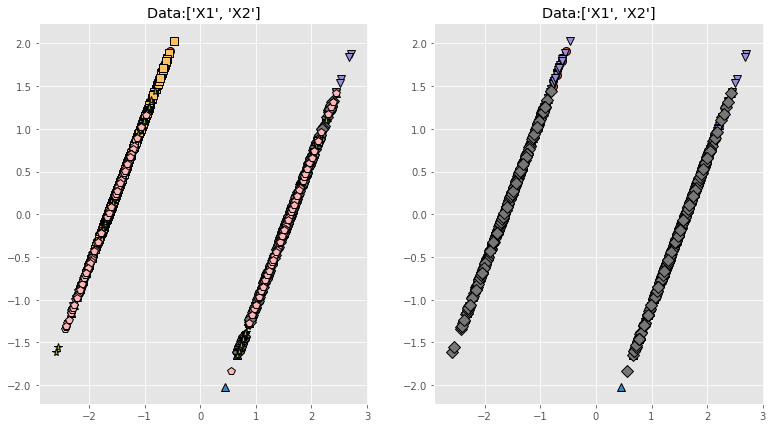

In [583]:
# PCA 함수의 동작 확인과 원본 데이터에 대한 시각화를 진행해보았습니다 
fig, axes = plt.subplots(1,2,figsize=(13,7))

processed_data_X = processed_data.drop(['Class', 'Class4'], axis=1) # X variable
processed_data_y = processed_data[['Class', 'Class4']].copy() # y variable, true 

# 원본 데이터 class 7개의 경우 
true_data = generate_pca(processed_data_X, 2)
mglearn.discrete_scatter(true_data['X1'], true_data['X2'], processed_data_y['Class'], ax=axes[0], s=8)
axes[0].set_title("Data:" + str(list(true_data.keys())))

# 원본 데이터 class 4개의 경우 
true_data = generate_pca(processed_data_X, 2)
mglearn.discrete_scatter(true_data['X1'], true_data['X2'], processed_data_y['Class4'], ax=axes[1],s=8)
axes[1].set_title("Data:" + str(list(true_data.keys())))

# 5. Clsutering 

processed_data -> input_data

Clustering 군집화는 유사한 속성을 갖는 샘플들을 묶어 k개의 군집(cluster)로 나누는 비지도 학습 기법입니다.  

군집화 기법에는 대표적으로 세 가지가 존재합니다. 
1. K-means Clustering K-평균 군집화 
2. Hierarchical Clustering 계층적 군집화
3. DBSCAN 밀도 기반 군집화

각각을 실험해보고 이번 **식습관과 체질에 따른 비만도 측정 데이터** 에 가장 적합한 군집화 기법을 찾아보겠습니다. 

In [63]:
# 전처리된 데이터를 따로 저장합니다 
# 전처리된 데이터 : processed_data
# 알고리즘 입력 데이터 : input_data 
# processed_data -> input_data 
input_data = processed_data.copy()

# X 변수들과 y 변수를 따로 저장하여 다루면 용이합니다 
input_data_X = input_data.drop(['Class', 'Class4'], axis=1) # X variable
input_data_y = input_data[['Class', 'Class4']].copy() # y variable, true 

# 군집화와 정답 데이터 비교를 위해서 true data를 따로 만들어줍니다 
# 대신 true data를 시각화하기 위해서 pca를 미리 해둡시다 
true_data = generate_pca(input_data_X, 2)
true_data = pd.concat([true_data, input_data_y], axis=1)

In [141]:
# 산점도 가시화 함수, 군집화 결과를 쉽게 시각화해주는 함수입니다
def Simple_Scatter(data, x1, x2, y, Name): # data를 넣을 때는 pca가 된 데이터(x1, x2, y)를 넘겨주어야 함! 
    G = sns.jointplot(x = data[x1], y = data[x2], data = data, kind='scatter', hue = data[y])
    G.fig.suptitle("Data : " + str(Name), fontsize = 10, color = 'black', alpha = 0.9)

## 5.1 K-means Clsutering 

대표적인 분리형 군집화 알고리즘입니다.  
- 각 군집은 하나의 centroid(중심)을 가짐 
- 각 개체는 가장 가까운 중심에 할당되며, 같은 중심에 할당된 개체들이 모여 하나의 군집을 생성 
- 사전에 군집의 수 K를 정해주어야 알고리즘을 실행할 수 있음 


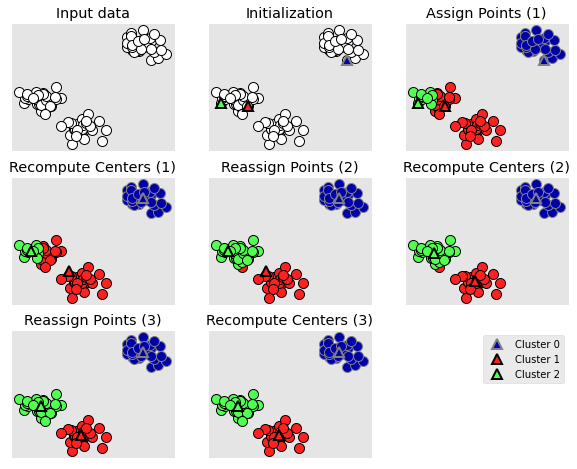

In [91]:
mglearn.plots.plot_kmeans_algorithm()

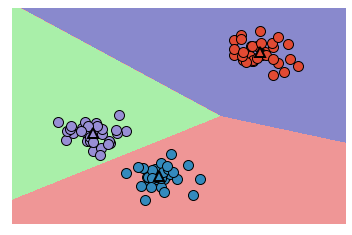

In [92]:
# K-Means 에 따라 학습된 decision boundary 가시화
mglearn.plots.plot_kmeans_boundaries()

In [93]:
# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, Init_Method = 'k-means++', Num_Init=10):
    fig, axes = plt.subplots((np.max(list(Select_k)))//6 + 1, 4, figsize=(20, 10)) 
    for i in Select_k:  
        row = ((i-2) //4)
        col = ((i-2) % 4)
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data) 
        Data = generate_pca(Data, 2)
        mglearn.discrete_scatter(Data[Data.columns[0]], Data[Data.columns[1]], Kmeans_Clustering.labels_, ax=axes[row, col], s=7) 
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[row, col], s=10)
        Score = np.round(silhouette_score(Data, Kmeans_Clustering.labels_),3)
        axes[row, col].set_title( 'k = ' + str(i)+' / S_Score:'+str(Score))

## K-Means 알고리즘, 초기 값 설정의 중요성 실험

K-Means의 hyper parameter 중 하나인 **n_init** 을 조정하여 알고리즘의 초기 값 설정의 중요성을 실험합니다.  
n_init은 초기 centroid 중심 위치를 잡는 시도 횟수로 scikit-learn 공식 문서에서 default는 10이라고 하며 이는 10개의 무작위 중심 위치 목록 중 가장 좋은 값을 선택한다는 의미이다.  

정답 데이터의 class가 최소 4개 최대 7개이므로 이를 감안하여 10개까지의 cluster를 생성해보았다.  
- n_init 
    - 초기 값을 잡는 임의의 횟수 
    - Number of time the k-means algorithm will be run with different centroid seeds

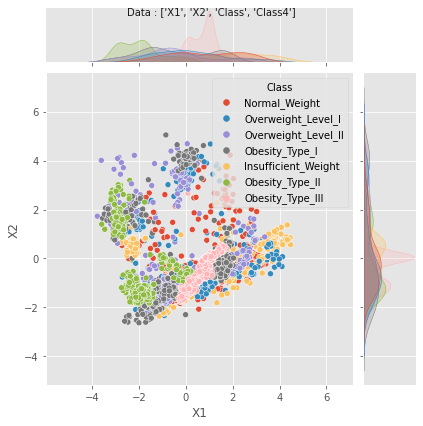

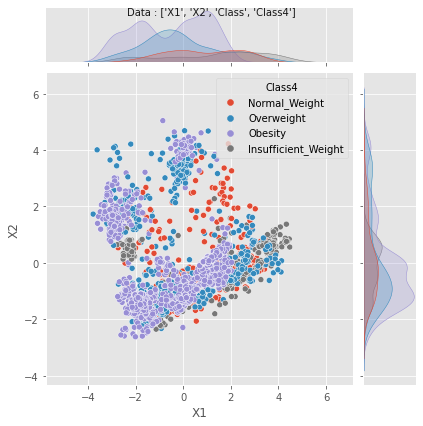

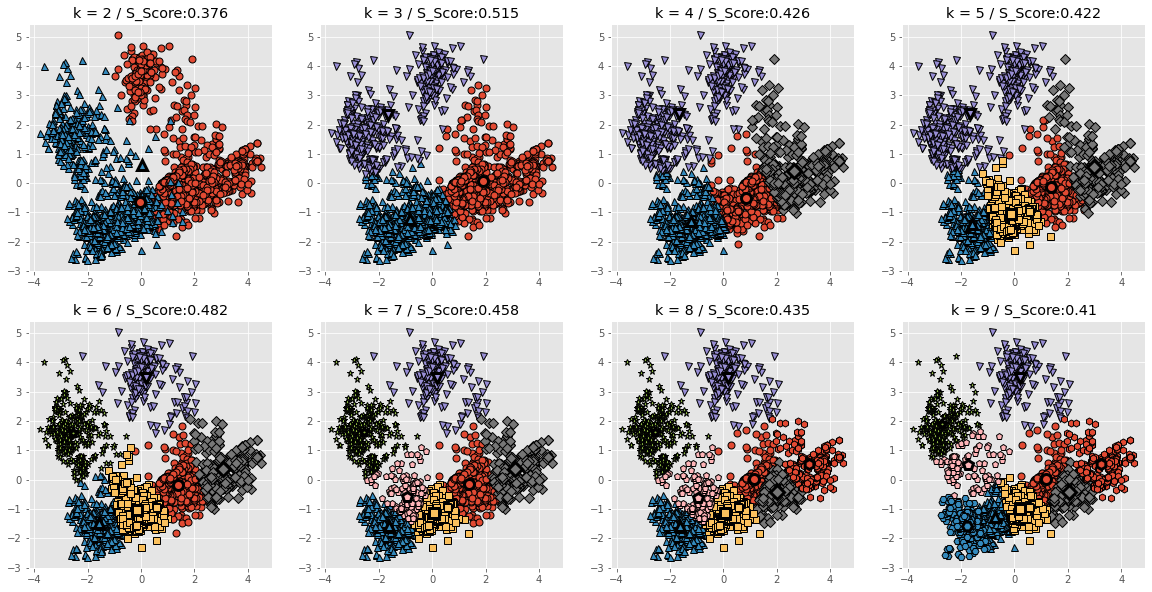

In [164]:
Simple_Scatter(true_data, 'X1', 'X2', 'Class', list(true_data.keys()))
Simple_Scatter(true_data, 'X1', 'X2', 'Class4', list(true_data.keys()))

k_Means_Plot(Data = input_data_X, Select_k = range(2, 10), Init_Method='random', Num_Init=1)

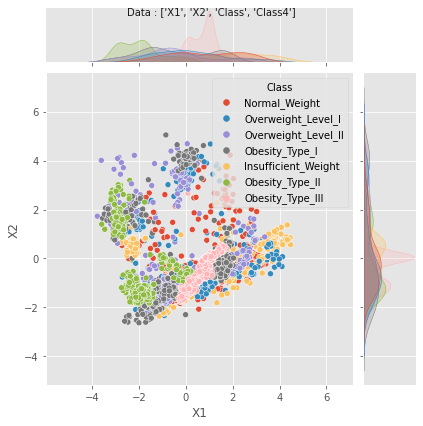

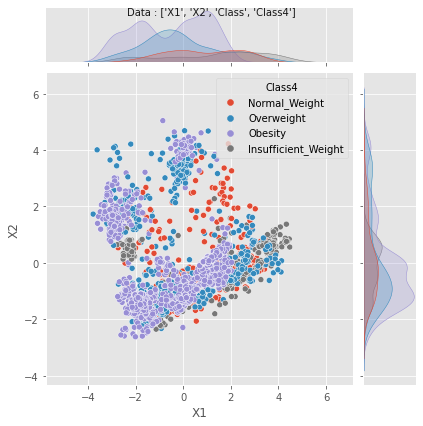

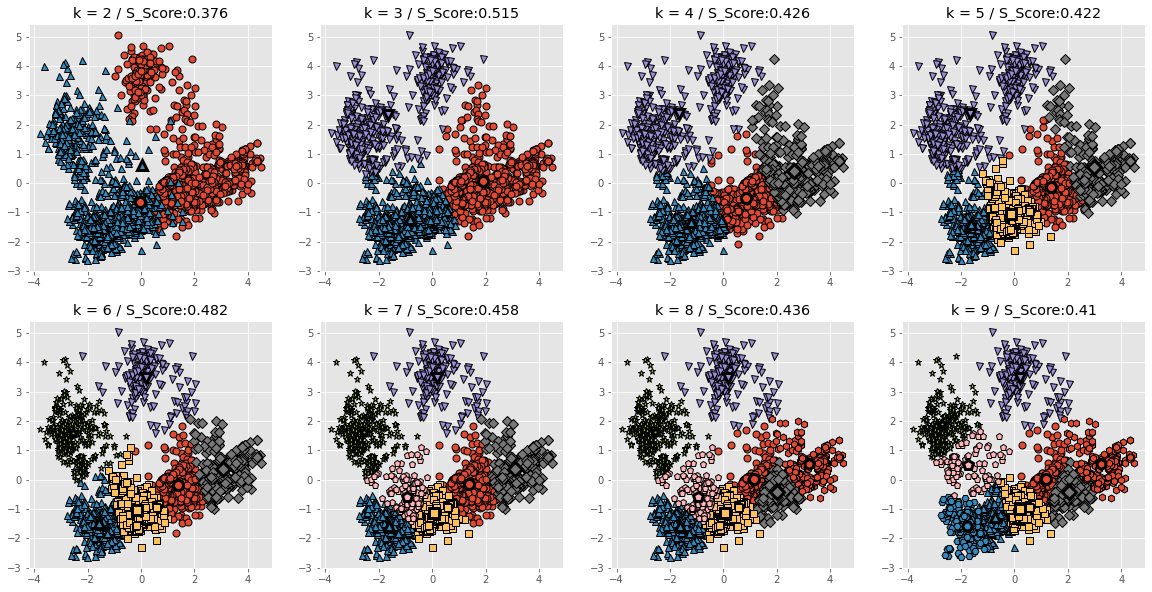

In [165]:
Simple_Scatter(true_data, 'X1', 'X2', 'Class', list(true_data.keys()))
Simple_Scatter(true_data, 'X1', 'X2', 'Class4', list(true_data.keys()))

k_Means_Plot(Data = input_data_X, Select_k = range(2, 10), Init_Method='random', Num_Init=1)

In [166]:
inertia = []
for i in range(2,10):
    kmeans_plus = KMeans(n_clusters = i,random_state = 15,  n_init=100)
    kmeans_plus.fit(input_data_X)
    inertia.append(kmeansplus.inertia)

plt.plot(range(1,6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

NameError: name 'kmeansplus' is not defined

## K-Means++ 사용하기 

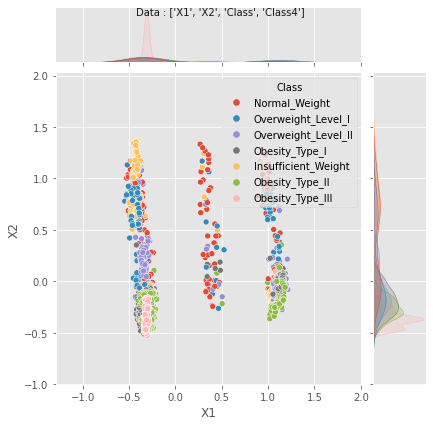

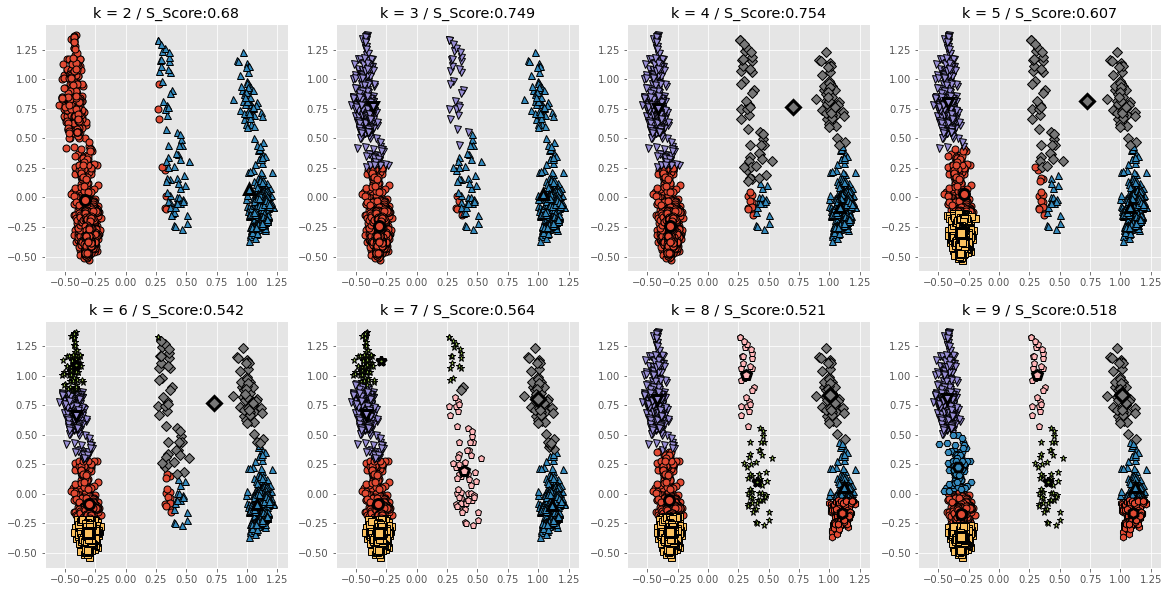

In [46]:
Simple_Scatter(input_data.iloc[:, :3], list(input_data.keys()))
    
k_Means_Plot(Data = input_data.iloc[:, :2],
                 Select_k = range(2, 10),
                 Init_Method='k-means++',Num_Init=1)

# 5. Hierarchical Clsutering 

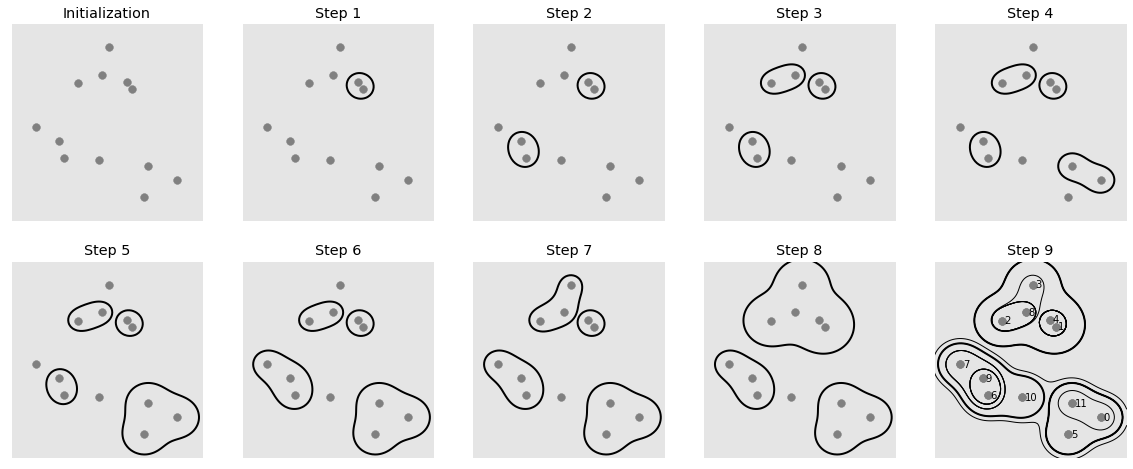

In [401]:
mglearn.plots.plot_agglomerative_algorithm()
mglearn.plots.plot_agglomerative()

In [42]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

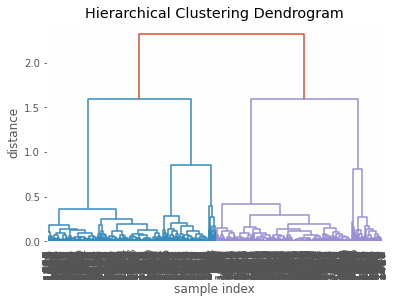

In [403]:
Fixed_Dendrogram(input_data[['X1','X2']], -1, True) # -1: nomeaningful value

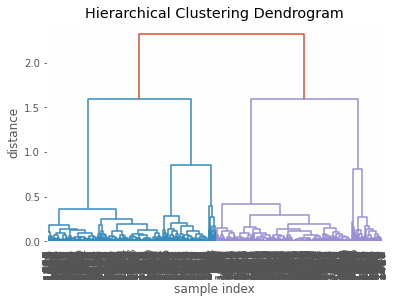

In [404]:
Fixed_Dendrogram(input_data[['X1','X2']], 10, True)

In [49]:
def Hclust_Plot(Data,Select_k,NAME):   
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data)
        mglearn.discrete_scatter(Data['X1'], Data['X2'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" +  str(NAME) + 'k = ' + str(i))
        Score=np.round(silhouette_score(Data,P_Labels),3)
        axes[i - 2].set_title('k = ' + str(i)+' / S_Score:'+str(Score))

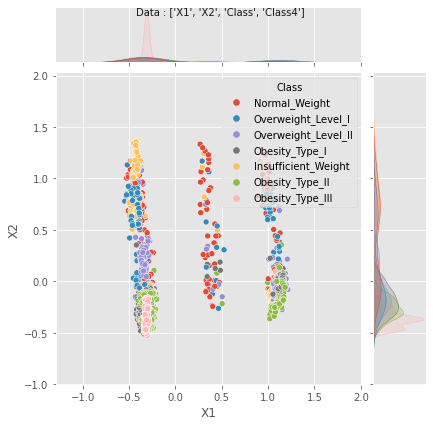

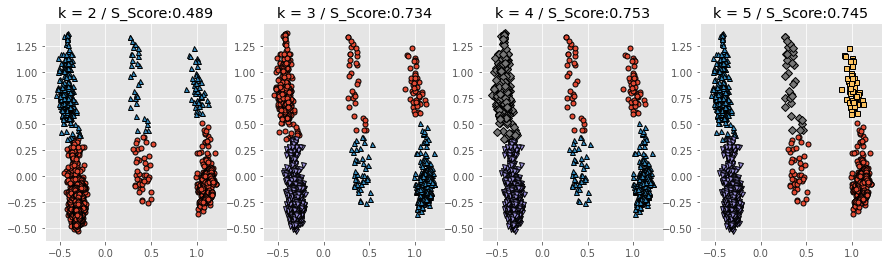

In [50]:
Simple_Scatter(input_data.iloc[:, :3], list(input_data.keys()))
Hclust_Plot(input_data.iloc[:, :2],
                range(2, 6), list(input_data.keys()))

# 6. DBSCAN Clsutering 

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


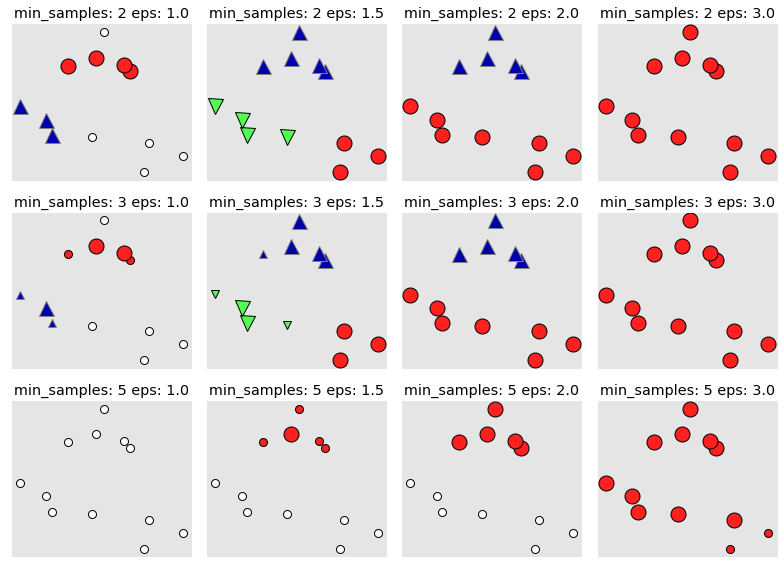

In [51]:
mglearn.plots.plot_dbscan()

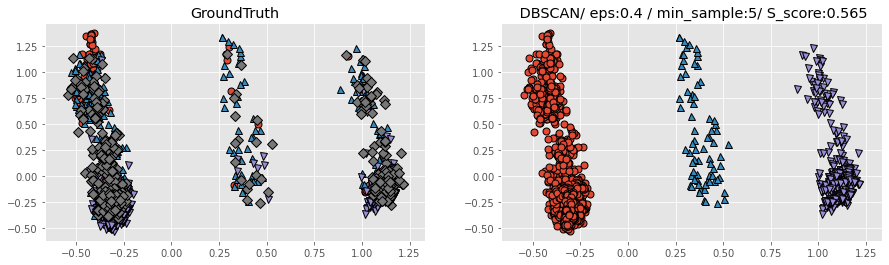

In [56]:
def DBSCAN_Plot(Data, NAME, min_samples=5, eps=0.4):
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data[['X1', 'X2']])
    Score=np.round(silhouette_score(Data[['X1', 'X2']],Results),3)
    mglearn.discrete_scatter(Data['X1'], Data['X2'], Data['Class4'], ax=axes[0], s=7)
    axes[0].set_title('GroundTruth')    
    mglearn.discrete_scatter(Data['X1'], Data['X2'], Results, ax=axes[1], s=7)
    axes[1].set_title(' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))


DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']], NAME="Obesity")

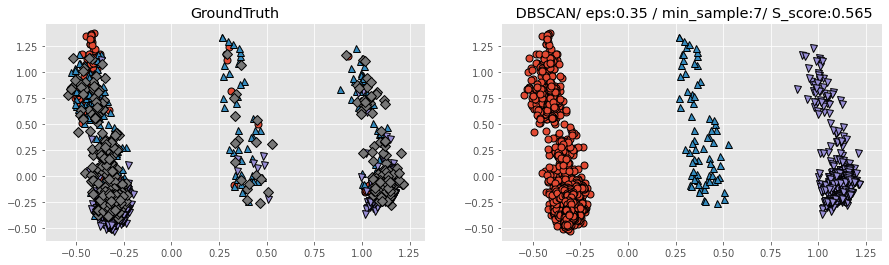

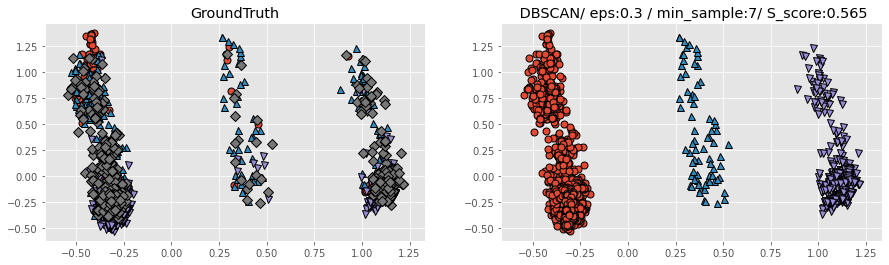

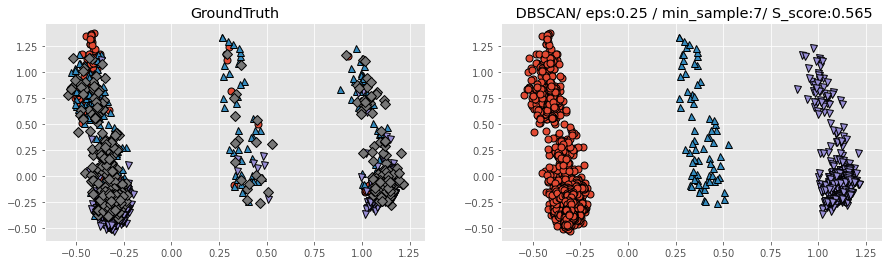

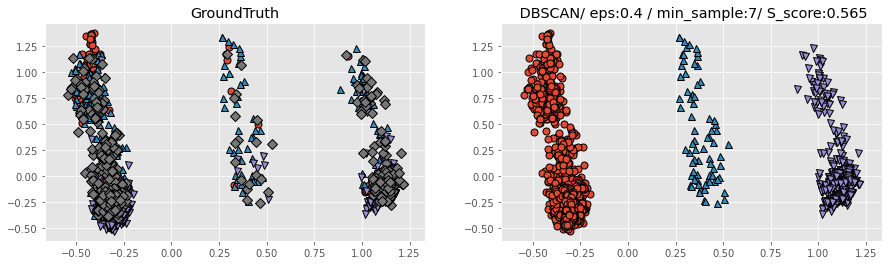

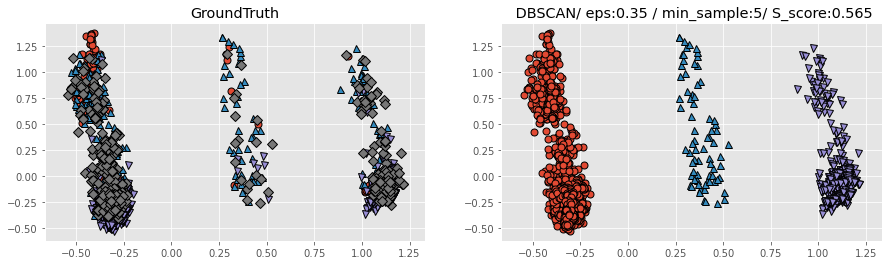

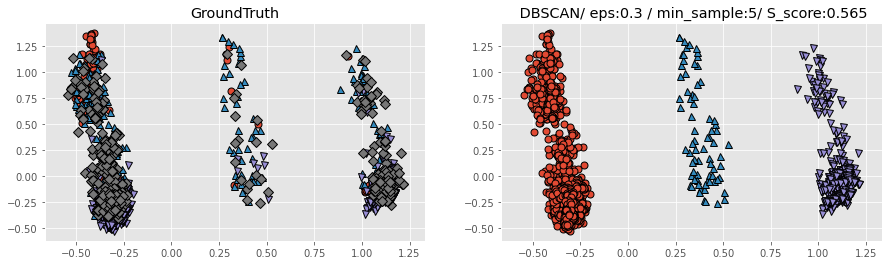

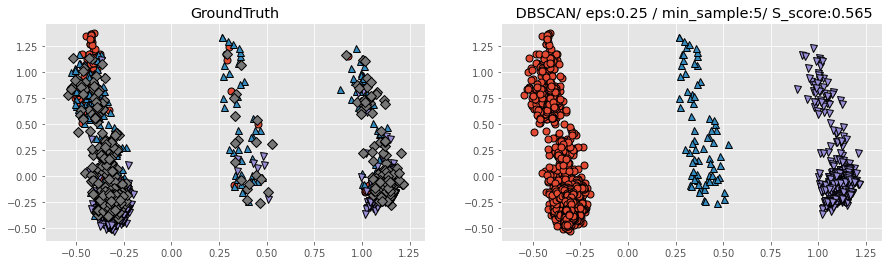

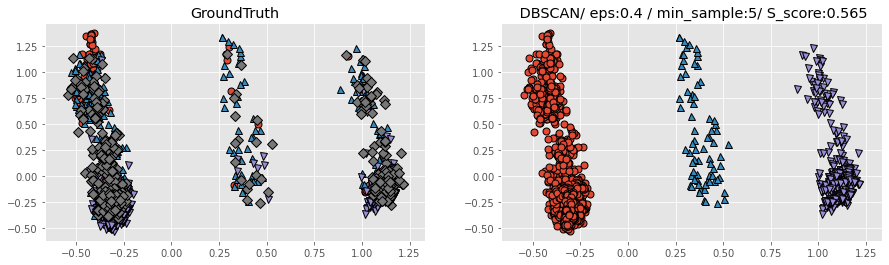

In [57]:
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.40)

(<Figure size 1056x576 with 6 Axes>,
 {0: <AxesSubplot:ylabel='Density'>,
  1: <AxesSubplot:>,
  2: <AxesSubplot:>,
  3: <AxesSubplot:xlabel='Class - 7', ylabel='X1, X2'>,
  4: <AxesSubplot:xlabel='Class - 4'>,
  5: <AxesSubplot:xlabel='Density'>})

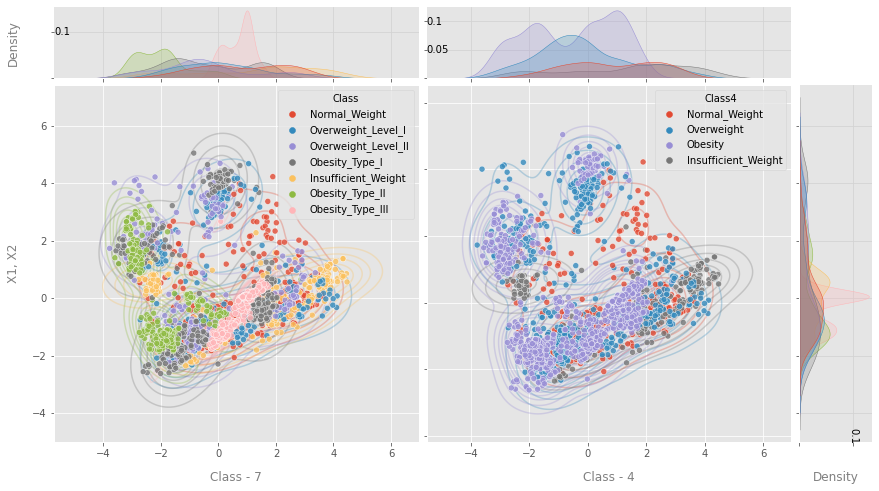

In [161]:
def jointplots(xs, y, data, hue=None, height=6, ratio=5, space=0.2, xlabels=None, ylabel=None, margin_norm=False):
    ### 2. figure
    h_margin = height / (ratio + 1)
    h_joint = height - h_margin
    
    if isinstance(xs, list):
        n_x = len(xs)
    else:
        n_x = 1
    
    widths = [h_joint] * n_x + [h_margin]
    heights = [h_margin, h_joint]
    ncols = len(widths)
    nrows = len(heights)
    
    fig = plt.figure(figsize=(sum(widths), sum(heights)))
    
    ### 3. gridspec preparation
    spec = fig.add_gridspec(ncols=ncols, nrows=nrows, 
                            width_ratios = widths, height_ratios = heights,
                            wspace=space, hspace=space)
                             
    ### 4. setting axes
    axs = {}
    for i in range(ncols * nrows):
        axs[i] = fig.add_subplot(spec[i//ncols, i%ncols])
    
    
    ### 5. jointplots (scatterplot + kdeplot)
    cnt = 0
    for i, x in enumerate(xs, ncols):
        
        sns.kdeplot(x=x, y=y, data=data, hue=hue[cnt], alpha=0.3, ax=axs[i], zorder=2, legend=False)
        sns.scatterplot(x=x, y=y, data=data, hue=hue[cnt], alpha=0.8, ax=axs[i], zorder=3, legend=True)
        cnt = cnt + 1 
    
    
    ### 6. kdeplots at marginal axes
    axs[ncols-1].axis("off")
    
    axes_mx = list(range(ncols-1))
    axes_my = 2*ncols - 1
    
    cnt = 0
    for i, x in zip(axes_mx, xs):
        sns.kdeplot(x=x, data=data, hue=hue[cnt], fill=True, ax=axs[i], zorder=2, legend=False)
        axs[i].set_xlim(axs[i+ncols].get_xlim())
        axs[i].set_xlabel("")
        axs[i].set_xticklabels([])
        axs[i].spines["left"].set_visible(False)
        axs[i].spines["top"].set_visible(False)
        axs[i].spines["right"].set_visible(False)
        cnt = cnt + 1 
    
    sns.kdeplot(y=y, data=data, hue=hue[0], fill=True, ax=axs[axes_my], zorder=2, legend=False)
    axs[axes_my].set_ylim(axs[ncols].get_ylim())
    axs[axes_my].set_ylabel("")
    axs[axes_my].set_yticklabels([])
    axs[axes_my].spines["bottom"].set_visible(False)
    axs[axes_my].spines["top"].set_visible(False)
    axs[axes_my].spines["right"].set_visible(False)
    
    if margin_norm == True:
        hist_range_max = max([axs[m].get_ylim()[-1] for m in axes_mx] + [axs[axes_my].get_xlim()[-1]])
        for i in axes_mx:
            axs[i].set_ylim(0, hist_range_max)
        axs[axes_my].set_xlim(0, hist_range_max)
        
    ### 7. unnecessary elements removal
    # 7.1. labels and ticklabels
    axes_j = list(range(ncols, 2*ncols-1))
    for i in axes_j:
        if i != ncols:
            axs[i].set_ylabel("")
            axs[i].set_yticklabels([])
    
    # 7.2. marginal axes
    for i in axes_mx:
        if i != 0:
            axs[i].set_ylabel("")
        
        axs[i].grid("on", color="lightgray", zorder=0)
        axs[i].set_yticklabels([])
        
        yticks = axs[i].get_yticks()
        ylim = axs[i].get_ylim()
        for ytick in yticks:
            if 0 < ytick < ylim[-1]:
                axs[i].text(axs[i].get_xlim()[0], ytick, str(ytick), 
                            fontdict={"verticalalignment":"center"})
        
    axs[axes_my].grid("on", color="lightgray", zorder=0)
    axs[axes_my].set_xticklabels([])
    axes_my_xticks = axs[axes_my].get_xticks()
    axes_my_xlim = axs[axes_my].get_xlim()
    for xtick in axes_my_xticks:
        if 0 < xtick < axes_my_xlim[-1]:
            axs[axes_my].text(xtick, axs[axes_my].get_ylim()[0], str(xtick), 
                              rotation=270, fontdict={"horizontalalignment":"center"})
    
    # 7.3. labels
    font_label = {"color": "gray", "fontsize":"large"}
    labelpad = 12
    for i, x in zip(axes_j, xlabels):
        axs[i].set_xlabel(x, fontdict=font_label, labelpad=labelpad)
        if i == ncols:
            axs[i].set_ylabel(ylabel, fontdict=font_label, labelpad=labelpad)
    
    axs[0].set_ylabel("Density", fontdict=font_label, labelpad=labelpad)
    axs[2*ncols-1].set_xlabel("Density", fontdict=font_label, labelpad=labelpad)
    
    fig.align_ylabels([axs[0], axs[ncols]])
    fig.align_xlabels([axs[x] for x in range(ncols, 2*ncols)])
    plt.tight_layout()
    
    return fig, axs

jointplots(["X1", "X1"], "X2", true_data, hue=["Class", "Class4"], 
            height=8, ratio=5, space=0.03, 
            xlabels=["Class - 7", "Class - 4"], ylabel="X1, X2")